Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [17]:
NAME = "Muktadir Haque Sarker"
ID = "22101147"
SECTION = "13"

---

# Part 1: Representing a Polynomial

Polynomials are function of the following format

$$p(x) = a_0 + a_1 x ^ 1 + a_2 x ^ 2 + ... + a_n x ^ n,$$

where, $[a_0, a_1, \cdots a_n]$ are called coefficients and $n$ (called the degree or order) is a non-negative integer.


This can also be written as:

$$y = f(x) = a_0 x^0 + a_1 x ^ 1 + a_2 x ^ 2 + ... + a_n x ^ n.$$

**Example**
$$ y = 1 + 2x^2 + 5x^4 $$ is a polynomial of order 4 ($ = n$) with $n+1$ coeffecients $a_0 = 1, a_1 = 0, a_2 = 2, a_3 = 0, a_4 = 5$

**Method 1**: Using List

---

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# numpy is used for efficient array (vector or matrix) operations
# pyplot is used for plotting
# Must read: [https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm]

In [19]:
coeff = [2, 1, 2, 0, 5] # coeffecients of the polynomial
n = len(coeff) - 1 # degree. Remember: number of coeff = degree + 1

'''
For a single value of x, finding p(x)

Note that this is an example of block comment in python. A block comment
starts with three ' and ends with three '.
'''

x = 6.0
p_x = 0.0

#Your code HERE
for i in range(0, n+1):
    p_x += coeff[i] * (x ** i)

print(p_x)


x_arr = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
p_x_arr = []

#Your code HERE
for i in range(0, len(x_arr)):
    temp = 0
    for j in range(0, n+1):
        temp += coeff[j] * (x_arr[i] ** j)
    p_x_arr.append(temp)
print(p_x_arr)

6560.0
[10.0, 92.0, 428.0, 1318.0, 3182.0, 6560.0]


**Method 2 (Better)**: Using a Class

---
Complete the implementation of the polynomial class as showed in the lecture

In [20]:
'''
Lab task 1
Here we implement a Polynomial class with three methods: the constructor
__init__(), the toString method __repr__(), and a method to make the objects
of the class callable, __call__() method
'''

# Polynomial Class

class Polynomial:
  # Constructor, note that it starts and ends with two underscores
  def __init__(self, coeff):
    '''
    Every internal variable of the object must be saved and initialized
    in this method: self.variable = value
    '''
    self.coeff = coeff
    self.degree = len(coeff) - 1

  # Constructor to make the object callable
  def __call__(self, x_arr):
    '''
    Here we assumed x_arr is a numpy array. Remember that a numpy array acts
    like a vector (1D matrix). So an operation x + 1 would add 1 to each element
    of the matrix (unlike python's defaule list). Simlarly, x ** 2 would return
    element wise square of the array.

    Hence, this method would return an array, where the i'th element is the
    (polynomial) interpolated value of x[i], given the coeffecients a[i].
    '''
    p_x_arr = []

    # --------------------------------------------
    # HINT: Should look like
    # for i in range(self.degree + 1):
    #     ????
    # --------------------------------------------

    # remember 1: length = degree + 1 for a polynomial
    # remember 2: range(0, a) is same as range(a)
    # remember 3: range(a, b) means a is inclusive, b is exclusive

    # --------------------------------------------
    # YOUR CODE HERE

    coeff = self.coeff
    n = self.degree

    #Your code HERE
    for i in range(0, len(x_arr)):
        temp = 0
        for j in range(0, n+1):
            temp += coeff[j] * (x_arr[i] ** j)
        p_x_arr.append(temp)
    return p_x_arr

    # --------------------------------------------

  # String representation method of the object (similar to toString() of java)
  def __repr__(self):
    # remember: a formatted string must start with f.

    str_ret = f'Polynomial of degree {self.degree}\np(x) = '
    for i in range(self.degree + 1):
        a_val = self.coeff[i]
        if i != 0:
            if a_val >= 0:
                str_ret += f'+ {a_val}x^{i} '
            else:
                str_ret += f'- {-a_val}x^{i} '
        else:
            str_ret += f'{a_val}x^{i} '

    return str_ret

  # custom method 1: to get the degree of the polynomial
  def get_degree(self):
    # --------------------------------------------
    # YOUR CODE HERE
    return self.degree
    # --------------------------------------------

  # custom method 2: to get the coefficients of the polynomial
  def get_coeffs(self):
    # --------------------------------------------
    # YOUR CODE HERE
    return self.coeff
    # --------------------------------------------

In [21]:
# test cases for your answer
x_arr = np.array([1, 2, 3, 4, 5])

coeff = np.array([2.0, 1.0, 2.0, 0.0, 5.0])
p = Polynomial(coeff)

results = [  10,   92,  428, 1318, 3182]
test = p(x_arr)

np.testing.assert_array_equal(results, test)

In [22]:
# an example to see if our implementation works
coeff = np.array([2.0, 1.0, 2.0, 0.0, 5.0])
p = Polynomial(coeff)

print(p)  # check if printable
x_arr = np.array([1, 2, 3, 4, 5])
print()
print(f"p({x_arr}) =", p(x_arr)) # check if the object is callable
# should print p([1 2 3 4 5]) =  [  10.   92.  428. 1318. 3182.]

Polynomial of degree 4
p(x) = 2.0x^0 + 1.0x^1 + 2.0x^2 + 0.0x^3 + 5.0x^4 

p([1 2 3 4 5]) = [10.0, 92.0, 428.0, 1318.0, 3182.0]


# Part 2: Polynomial Interpolation (Matrix Method)

If we have  $n+1$ nodes, that is,  $\{(x_0, y_0), (x_1, y_1), (x_2, y_2), (x_{n}, y_{n})\}$ that satisfies a polynomial of order $n$, it can be written as:

\begin{align}
&a_0 + a_1  x_0 + a_2  x_0^2 + \cdots a_n  + x_0^n = y_0\\
&a_0 + a_1  x_1 + a_2  x_1^2 + \cdots a_n  + x_1^n = y_1\\
&a_0 + a_1  x_2 + a_2  x_2^2 + \cdots a_n  + x_2^n = y_2\\
&\cdots\\
&a_0 + a_1  x_{n-1} + a_2  x_{n}^2 + \cdots + a_n  x_{n}^n = y_{n}\\
\end{align}

Here, $p(x) = a_0 + a_1x^1 + a_2x^2 + \cdots a_nx^n$ is called the fitted polynomial of the given data points (nodes). Using this polynomial to find the $y_k$ corresponding to an $x_k$ with the range of the given nodes is called polynomial interpolation.

In matrix form, the equations can be written as  $$\mathbf{Xa = y},$$

where $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & x_0^2 & \cdots & x_0^n\\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^n\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x_n^0 & x_{n}^1 & x_n^2 & \cdots & x_n^n\\
\end{bmatrix}

$\mathbf{a} = $
\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}

and $\mathbf{y} = $
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}

From this, we can solve for $\mathbf{a}$ using
$$\mathbf{a = X^{-1}y}.$$



In [23]:
'''
Lab task 2
Here we implement a function which takes a discrete x and y array, and returns
a Polynomial object (the one we just implemented). This polynomial object can
be used to calculate y for any other value of x (not in that list) within the
range
'''
def get_poly(data_x, data_y):
    n_nodes = len(data_x)
    # np.zeors((a, b)) returns a (a x b) matrix, i.e., a rows and b columns
    X = np.zeros((n_nodes, n_nodes))

    # Populate the X matrix with appropriate values
    # YOUR CODE HERE

    for r in range(n_nodes):
        for c in range(n_nodes):
            X[r,c] = data_x[r]**c

    print(X)
    # --------------------------------------------
    # np.linalg.inv is used to find the inverse
    # but pinv is more efficient
    X_inv = np.linalg.pinv(X) # pseudo inverse
    a = np.dot(X_inv, data_y)
    P = Polynomial(a)

    return P

In [24]:
# test cases for your answer
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-90., -13., 6., 1., 5., 18.])
p = get_poly(data_x, data_y)

results = np.array([-90.,         -83.30765508, -76.8819829,  -70.72379557, -64.83328921,
 -59.2100643,  -53.8531459,  -48.76100404, -43.93157399, -39.36227655,
 -35.05003838, -30.9913123, -27.1820976,  -23.61796032, -20.29405359,
 -17.20513792, -14.34560149, -11.7094805,   -9.29047941,  -7.08199132,
  -5.07711821,  -3.26869128, -1.64929127,  -0.2112687,    1.05323572,
   2.15227091,   3.09405499,  3.88695506,   4.53946688,   5.06019453,
   5.45783013,   5.74113353,  5.91891202,   6.,           5.99323867,
   5.90745576,   5.75144519,   5.53394679,   5.26362596,   4.94905341,
   4.5986848,    4.22084051,   3.82368525,   3.41520781,   3.00320073,
   2.59524002,   2.19866481,   1.8205571,    1.46772141,   1.14666448,
   0.86357501,   0.62430327,   0.4343409,    0.2988005,   0.22239539,
   0.2094193,    0.26372602,   0.38870917,   0.5872818,    0.86185618,
   1.21432341,   1.64603319,   2.15777345,   2.74975008,   3.42156662,
   4.17220396,   5.,           5.9026294,    6.87708321,   7.91964864,
   9.02588868,  10.19062185,  11.40790184,  12.67099728,  13.97237137,
  15.30366157,  16.65565937,  18.01828989,  19.38059166, 20.73069622,
  22.05580792,  23.34218353,  24.57511198,  25.73889404,  26.816822,
  27.7911594,   28.6431207,  29.35285096,  29.89940558,  30.26072995,
  30.41363916,  30.33379771,  29.99569918,  29.37264593,  28.43672882,
  27.15880687,  25.50848696,  23.45410355,  20.96269834,  18.        ])

x_arr = np.linspace(-3, 3, 100)
test = p(x_arr)

np.testing.assert_array_almost_equal(test, results)

[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]


[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]


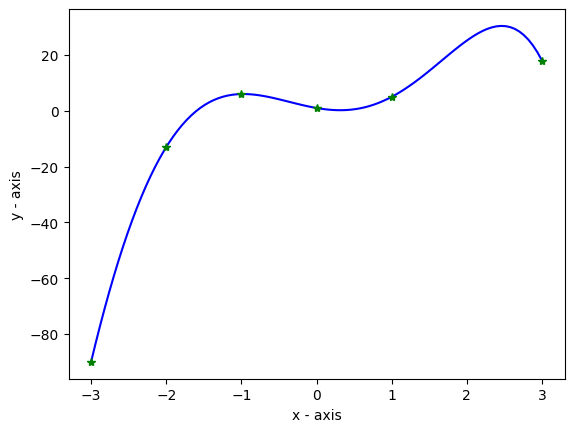

In [25]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-90., -13., 6., 1., 5., 18.])
p = get_poly(data_x, data_y)
'''
np.linspace(a, b, n) returns a numpy array of n points equally
spaced from a to b
'''
x_arr = np.linspace(-3, 3, 100)
# interpolated values
y_interp = p(x_arr)

# pyplot is used for plotting
# Must read: [https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm]

plt.plot(x_arr, y_interp, 'b')
plt.plot(data_x, data_y, 'g*')
plt.xlabel('x - axis')
plt.ylabel('y - axis')


plt.show()

**Problem related Polynomial interpolation:**

Suppose, you have three nodes (-0.5, 1.87), (0, 2.20), (0.5, 2.44). Using Vandermonde Matrix method, print out the value of the interpolating polynomial at x = 6.
You have to solve the given problem using above implemented **get_poly()** method.

In [28]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-90., -13., 6., 1., 5., 18.])
p = get_poly(data_x, data_y)
p = [6]

[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]
